In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Load the data
data_path = 'Airlines.csv'
airlines_data = pd.read_csv(data_path)

In [2]:
# Data preprocessing
# Selecting features and the target variable
X = airlines_data.drop(['Delay', 'id'], axis=1)
y = airlines_data['Delay']

# One-hot encoding for categorical features
categorical_features = ['Airline', 'AirportFrom', 'AirportTo']
X_encoded = pd.get_dummies(X, columns=categorical_features)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [3]:
# Training the Decision Tree model
decision_tree_model = DecisionTreeClassifier(random_state=42)
decision_tree_model.fit(X_train, y_train)

# Predicting on the test set
y_pred = decision_tree_model.predict(X_test)

Accuracy: 0.6118727810376633
Precision: 0.5766
Recall: 0.4804
F1 Score: 0.5241
ROC-AUC Score: 0.6171


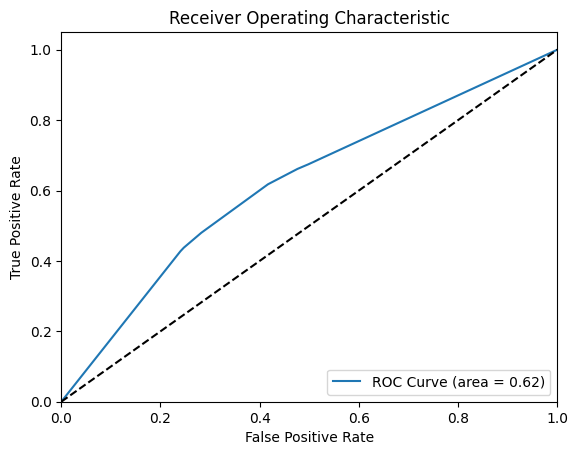

In [4]:
# Evaluating model performance
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Calculate the ROC-AUC score
y_pred_proba = decision_tree_model.predict_proba(X_test)[:,1]

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'ROC-AUC Score: {roc_auc:.4f}')

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

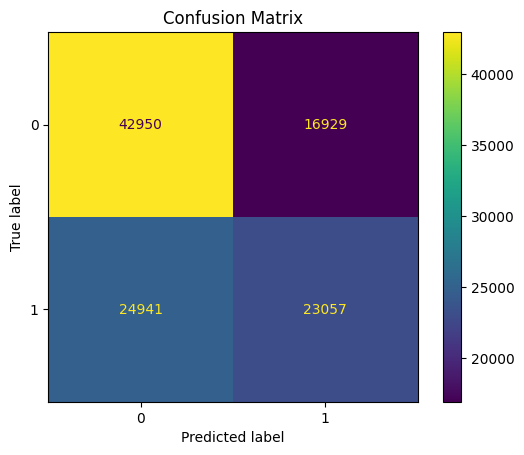

In [5]:
# Displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title('Confusion Matrix')
plt.show()

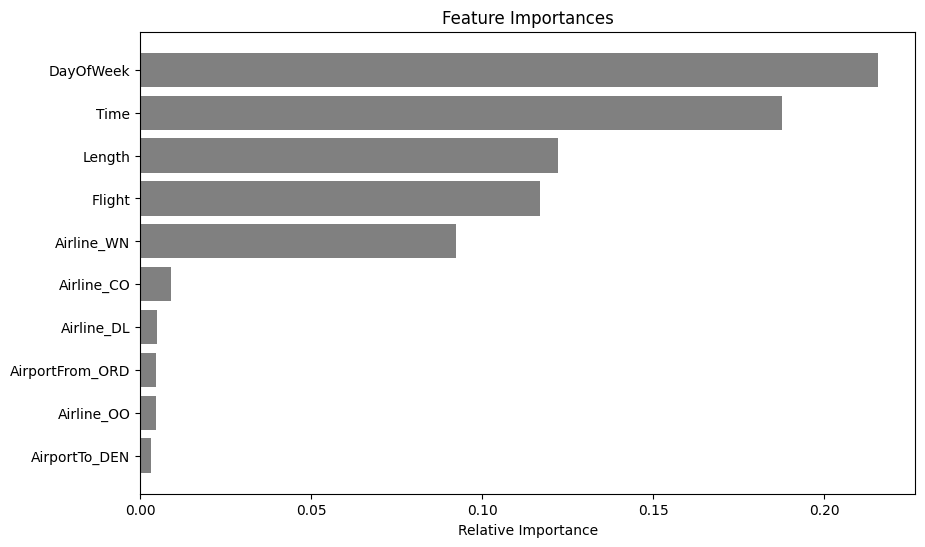

In [8]:
# Visualizing feature importances
feature_importances = decision_tree_model.feature_importances_
features = X_train.columns
indices = np.argsort(feature_importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='grey', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

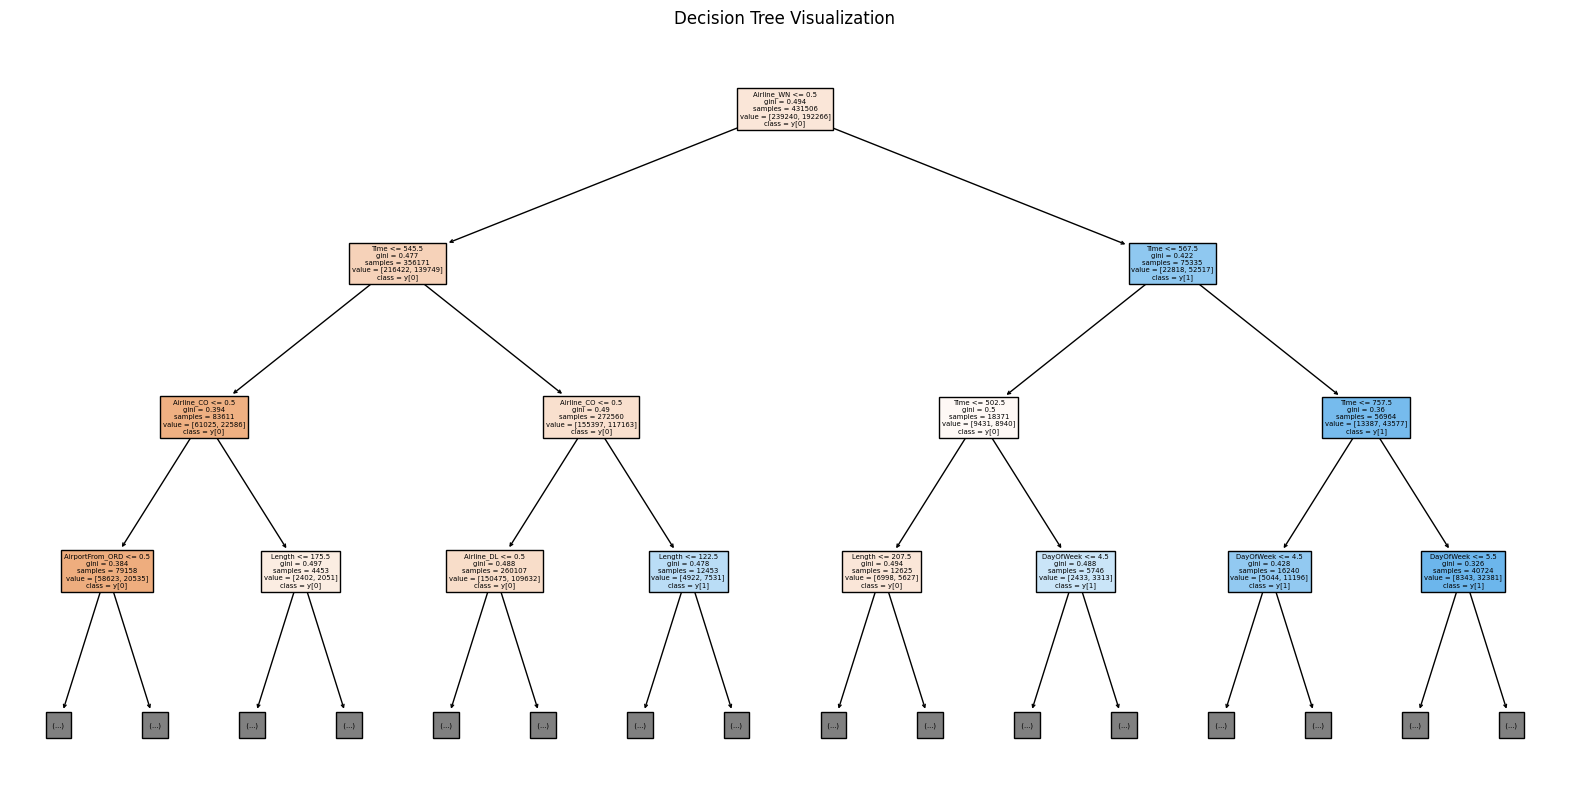

In [9]:
# Visualizing the Decision Tree (Only showing the top of the tree due to its potential size)
plt.figure(figsize=(20,10))
plot_tree(decision_tree_model, max_depth=3, feature_names=X_train.columns, class_names=True, filled=True)
plt.title('Decision Tree Visualization')
plt.show()